# Analyzing experimental results

In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 1: Collect all the data

In [3]:
path = "C:/Users/sqshy/Desktop/University/Fifth Year/research/DistortionSim/data"
data_files = [path+"/"+item for item in os.listdir(path) if 'instances' not in item]
df_list = [pd.read_csv(item) for item in data_files]
df = pd.concat(df_list)
df.index = list(range(len(df)))
df = df.drop(columns=['Unnamed: 0', 'id'])
df.loc[df['valuation'] == 'unit_range_arrow_0.5', 'valuation'] = 'unit_range_arrow_05' #fixing a typo if it comes up
df

,val_index,size,valuation,algo,distortion,0
0,1.0,5.0,unit_range_abdulkadiroglu_0,serial_dictatorship,1.041518,NaN
1,1.0,5.0,unit_range_abdulkadiroglu_0,partial_max_matching_1.0,1.186388,NaN
2,1.0,5.0,unit_range_abdulkadiroglu_0,modified_max_matching,1.186388,NaN
3,1.0,5.0,unit_range_abdulkadiroglu_0,hybrid_max_matching,1.186388,NaN
4,2.0,5.0,unit_range_abdulkadiroglu_0,serial_dictatorship,1.000000,NaN
...,...,...,...,...,...,...
38795,399.0,100.0,unit_sum_unif,hybrid_max_matching,1.273510,NaN
38796,400.0,100.0,unit_sum_unif,serial_dictatorship,1.097189,NaN
38797,400.0,100.0,unit_sum_unif,partial_max_matching_4.0,1.147245,NaN
38798,400.0,100.0,unit_sum_unif,modified_max_matching,4.642085,NaN


## Step 2: Look at the maxima and minima, prep data for graphing

In [5]:
algorithms = set(df['algo'])
df_list = {}
for algorithm in algorithms:
    df_list[algorithm] = df[df['algo']==algorithm]
    
# because max size was 100 the m for PartialMaxMatching was either 1.0, 2.0, 3.0, or 4.0

In [58]:
df_list['partial_max_matching'] = pd.concat([df_list['partial_max_matching_1.0'], df_list['partial_max_matching_4.0'], df_list['partial_max_matching_2.0'], df_list['partial_max_matching_3.0']])

In [59]:
df_list.pop('partial_max_matching_1.0')
df_list.pop('partial_max_matching_2.0')
df_list.pop('partial_max_matching_3.0')
df_list.pop('partial_max_matching_4.0')

,val_index,size,valuation,algo,distortion
801,201,55,unit_range_abdulkadiroglu_0,partial_max_matching_4.0,1.087984
805,202,55,unit_range_abdulkadiroglu_0,partial_max_matching_4.0,1.086620
809,203,55,unit_range_abdulkadiroglu_0,partial_max_matching_4.0,1.132359
813,204,55,unit_range_abdulkadiroglu_0,partial_max_matching_4.0,1.135976
817,205,55,unit_range_abdulkadiroglu_0,partial_max_matching_4.0,1.117964
...,...,...,...,...,...
38381,396,100,unit_sum_unif,partial_max_matching_4.0,1.137417
38385,397,100,unit_sum_unif,partial_max_matching_4.0,1.153109
38389,398,100,unit_sum_unif,partial_max_matching_4.0,1.130227
38393,399,100,unit_sum_unif,partial_max_matching_4.0,1.142184


In [60]:
df_list.keys()

dict_keys(['hybrid_max_matching', 'serial_dictatorship', 'modified_max_matching', 'partial_max_matching'])

In [61]:
df_list['modified_max_matching']['distortion'].argmax()

9465

In [62]:
df_list['modified_max_matching'].iloc[9465]

val_index                       266
size                             70
valuation             unit_sum_unif
algo          modified_max_matching
distortion                  6.18659
Name: 37862, dtype: object

In [63]:
df_list['partial_max_matching']['distortion'].argmax()

334

In [64]:
df_list['partial_max_matching'].iloc[334]

val_index                           15
size                                 5
valuation            unit_sum_arrow_-1
algo          partial_max_matching_1.0
distortion                     2.76851
Name: 25657, dtype: object

In [65]:
df_list['hybrid_max_matching']['distortion'].argmax()

8851

In [66]:
df_list['hybrid_max_matching'].iloc[8851]

val_index                                           52
size                                                15
valuation     unit_sum_benabbou_middle_mean_middle_var
algo                               hybrid_max_matching
distortion                                     1.73279
Name: 35407, dtype: object

In [67]:
df_list['serial_dictatorship']['distortion'].argmax()

8633

In [68]:
df_list['serial_dictatorship'].iloc[8633]

val_index                                        234
size                                              60
valuation     unit_sum_benabbou_high_mean_middle_var
algo                             serial_dictatorship
distortion                                   5.28357
Name: 34532, dtype: object

In [69]:
templist = []
for key in df_list.keys():
    frame = df_list[key].groupby(['size', 'valuation']).mean()
    frame['size'] = [item[0] for item in frame.index]
    frame['valuation'] = [item[1] for item in frame.index]
    frame['algo'] = [key]*len(frame)
    frame.index = list(range(len(frame)))
    frame = frame.drop(columns=['val_index'])
    templist.append(frame)
    
df = pd.concat(templist)
df.index = list(range(len(df)))
df

,distortion,size,valuation,algo
0,1.082104,5,unit_range_abdulkadiroglu_0,hybrid_max_matching
1,1.066289,5,unit_range_abdulkadiroglu_05,hybrid_max_matching
2,1.000000,5,unit_range_abdulkadiroglu_1,hybrid_max_matching
3,1.023755,5,unit_range_arrow_-05,hybrid_max_matching
4,1.007886,5,unit_range_arrow_-1,hybrid_max_matching
...,...,...,...,...
1915,1.000080,100,unit_sum_arrow_1,partial_max_matching
1916,1.000021,100,unit_sum_arrow_2,partial_max_matching
1917,1.132991,100,unit_sum_benabbou_high_mean_middle_var,partial_max_matching
1918,1.104806,100,unit_sum_benabbou_middle_mean_middle_var,partial_max_matching


## Step 3: Plot the graphs we need

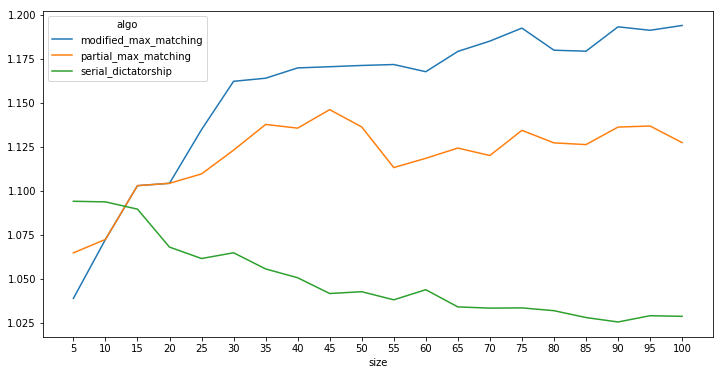

In [70]:
#unit-range unif case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_unif')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

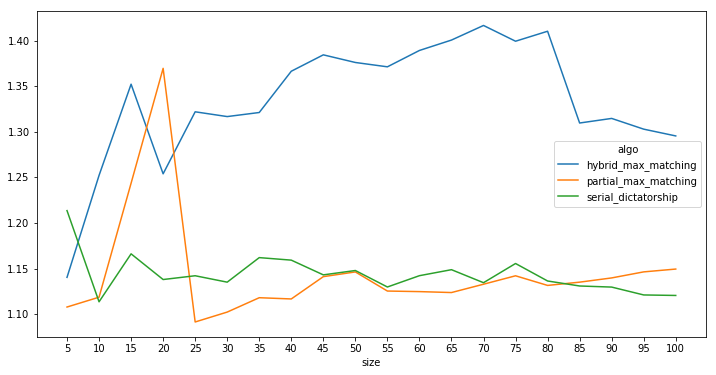

In [71]:
#unit-sum unif case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_unif')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

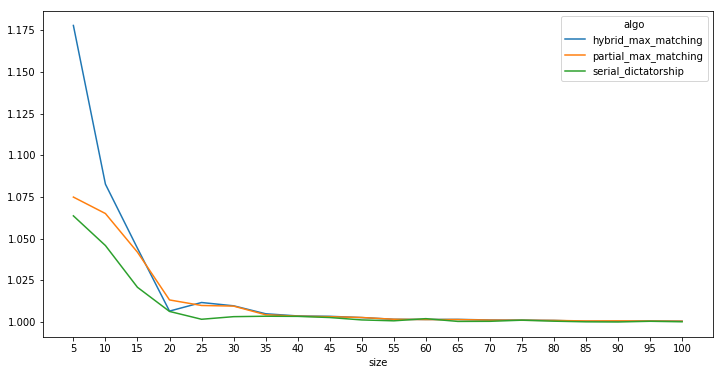

In [72]:
#unit-sum arrow 0.5 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

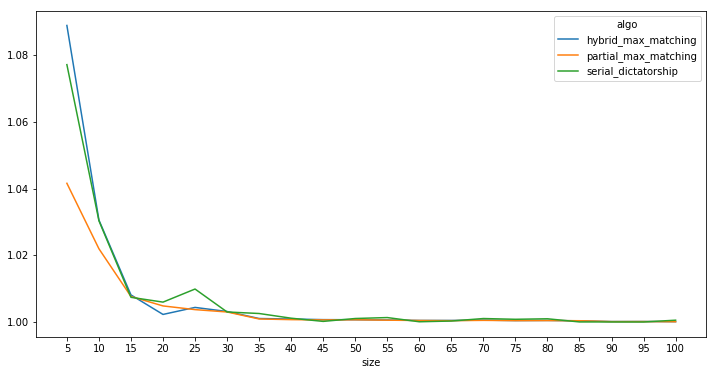

In [73]:
#unit-sum arrow 1 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

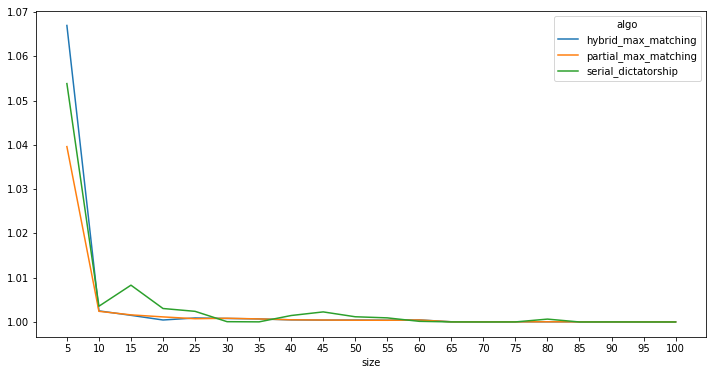

In [74]:
#unit-sum arrow 2 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_2')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

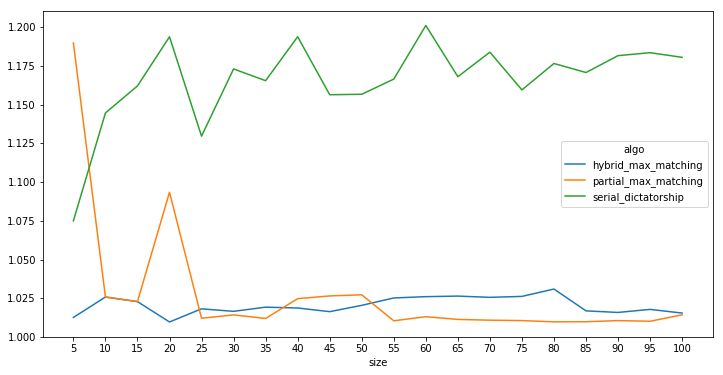

In [75]:
#unit-sum arrow -0.5 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_-05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

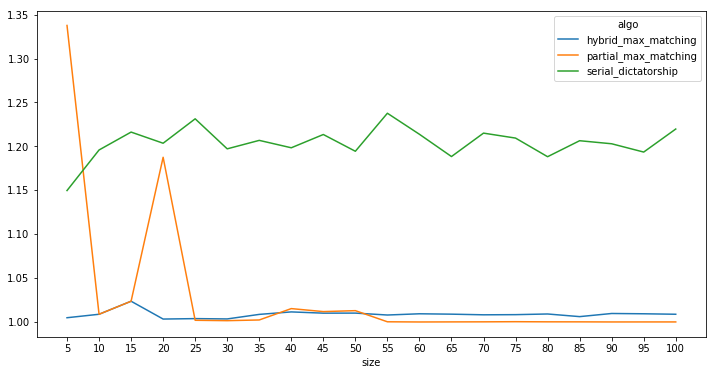

In [76]:
#unit-sum arrow -1 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_-1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

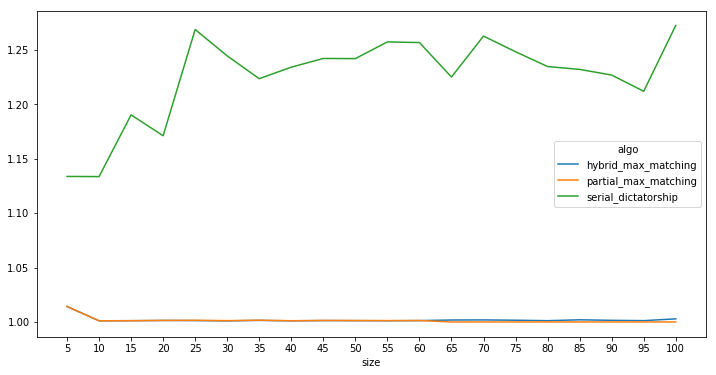

In [77]:
#unit-sum arrow -2 case
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_arrow_-2')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

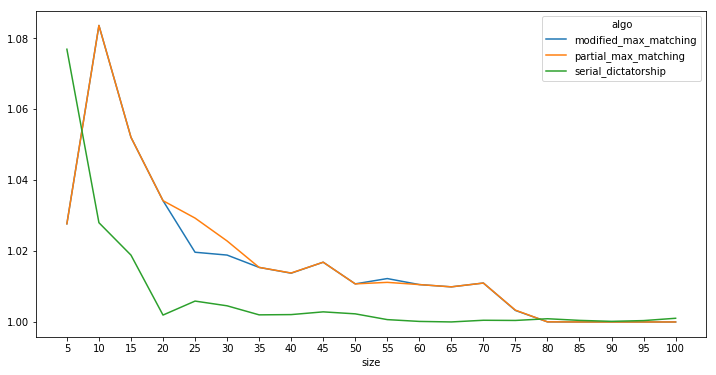

In [78]:
#unit-range arrow 0.5 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

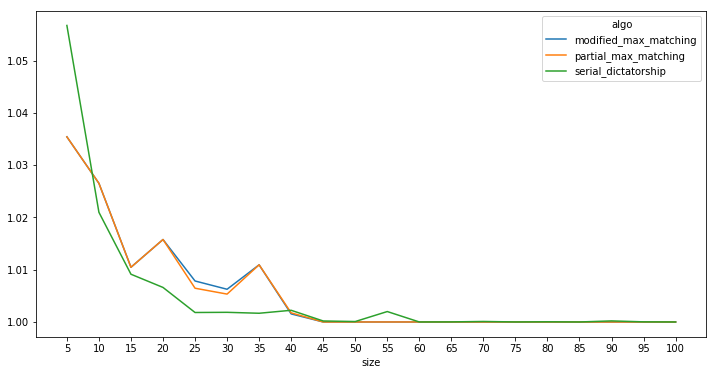

In [79]:
#unit-range arrow 1 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

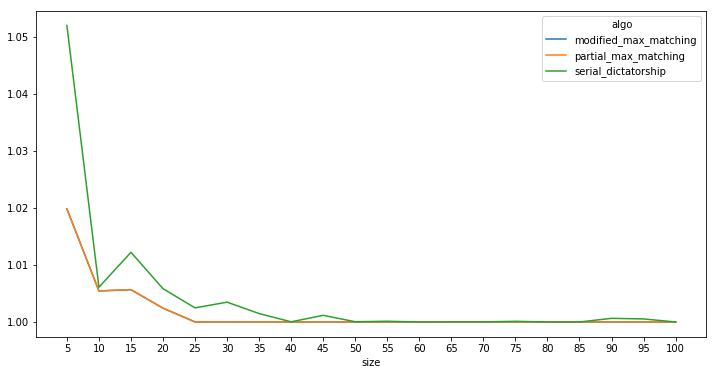

In [80]:
#unit-range arrow 2 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_2')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))
#NOTE - in this case ModifiedMaxMatching, PartialMaxMatching results were so close you can't even see the former.

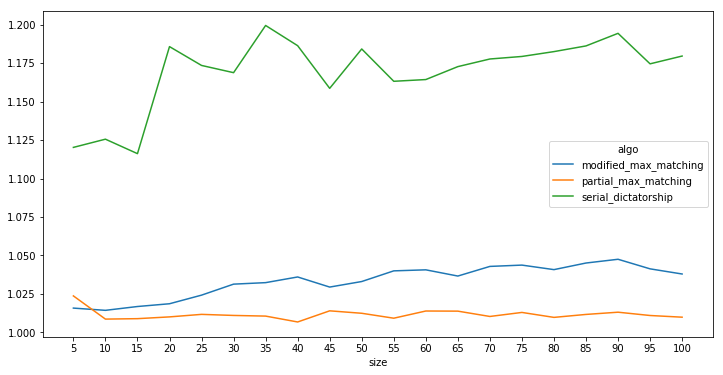

In [81]:
#unit-range arrow -0.5 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_-05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

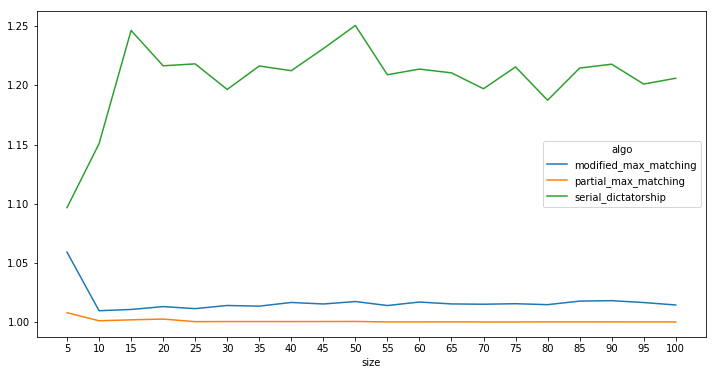

In [82]:
#unit-range arrow -1 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_-1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

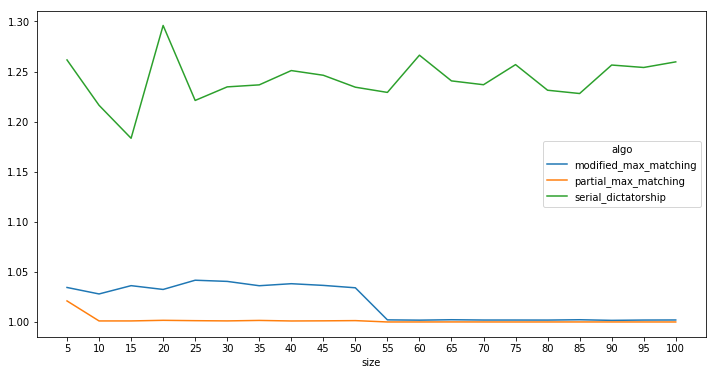

In [83]:
#unit-range arrow -2 case
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_arrow_-2')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

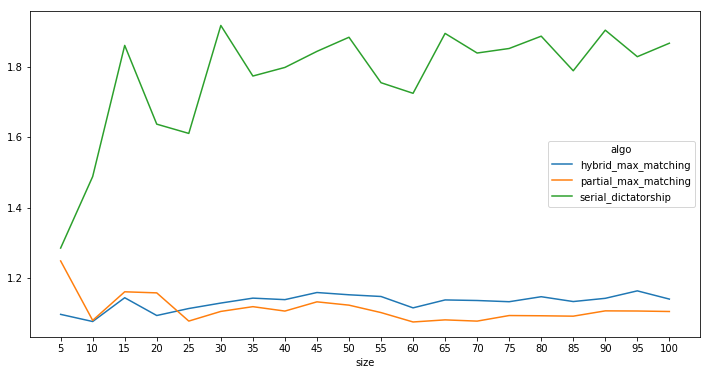

In [84]:
#unit-sum benabbou val, middle mean
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_benabbou_middle_mean_middle_var')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

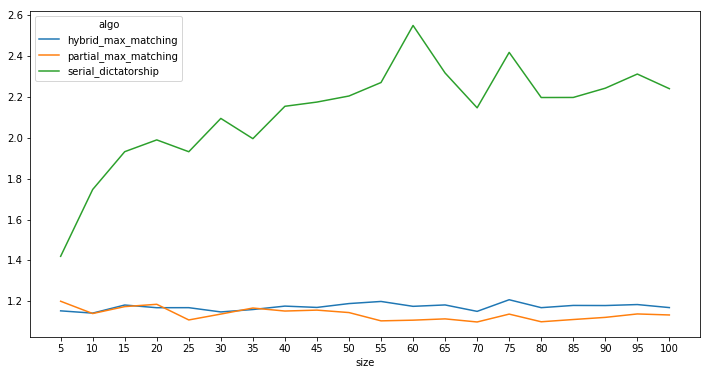

In [85]:
#unit-sum benabbou val, high mean
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_benabbou_high_mean_middle_var')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

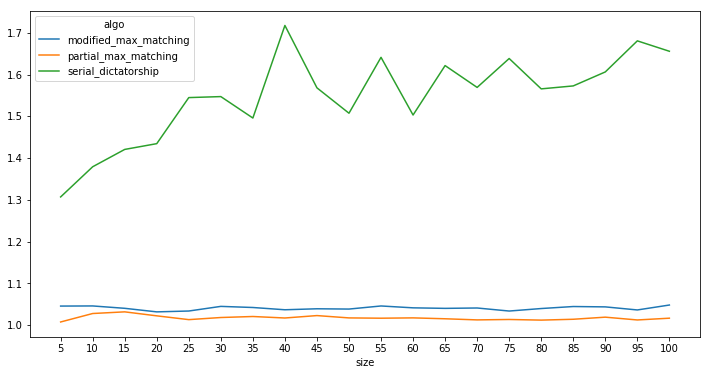

In [86]:
#unit-range benabbou val, middle mean
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_benabbou_middle_mean_middle_var')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

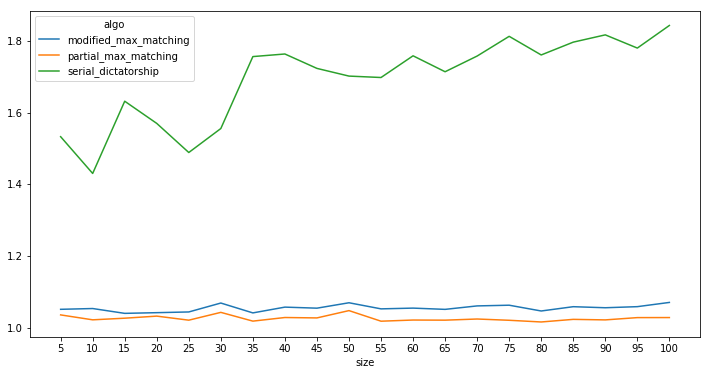

In [87]:
#unit-range benabbou val, high mean
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_benabbou_high_mean_middle_var')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

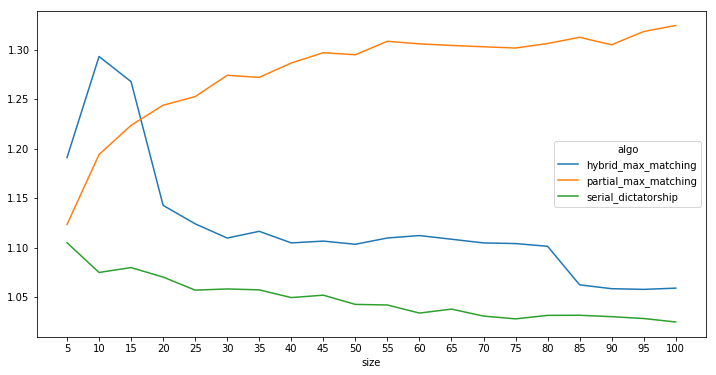

In [88]:
#unit-sum abdulkadiroglu val, 0
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_abdulkadiroglu_0')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

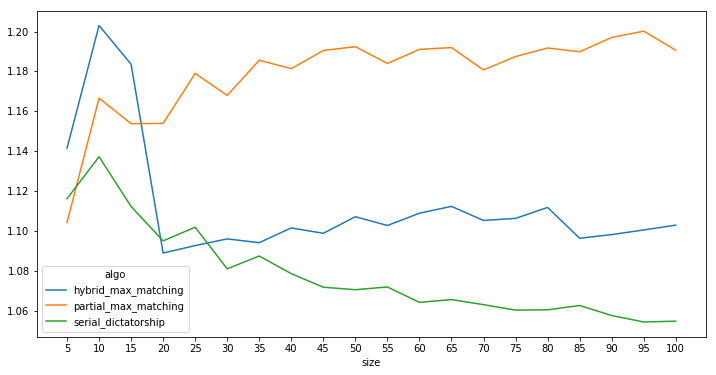

In [89]:
#unit-sum abdulkadiroglu val, 0.5
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_abdulkadiroglu_05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

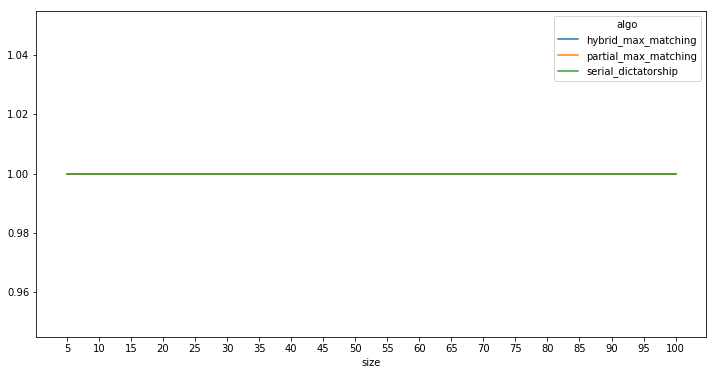

In [90]:
#unit-sum abdulkadiroglu val, 1
curr = df[(df['algo'] != 'modified_max_matching') & (df['valuation'] == 'unit_sum_abdulkadiroglu_1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

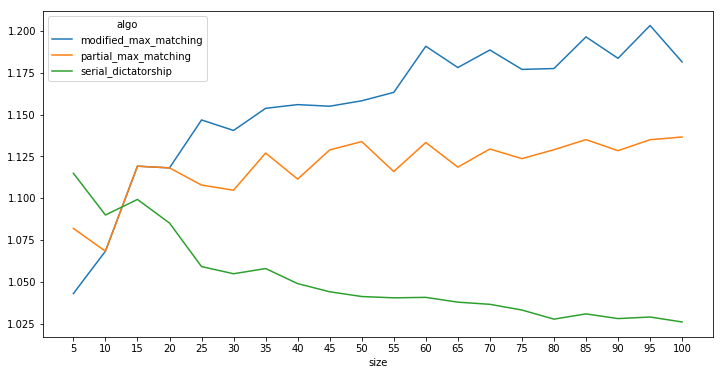

In [91]:
#unit-range abdulkadiroglu val, 0
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_abdulkadiroglu_0')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

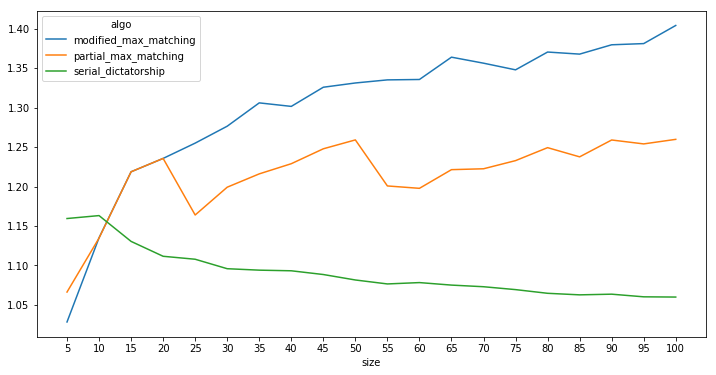

In [92]:
#unit-range abdulkadiroglu val, 0.5
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_abdulkadiroglu_05')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))

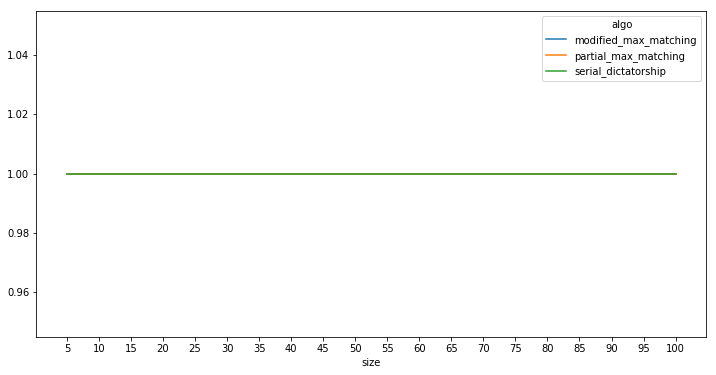

In [93]:
#unit-range abdulkadiroglu val, 1
curr = df[(df['algo'] != 'hybrid_max_matching') & (df['valuation'] == 'unit_range_abdulkadiroglu_1')]
curr = curr.pivot(index='size', columns = 'algo', values='distortion')
curr.plot(figsize=(12,6), xticks=np.arange(5,105,step=5))